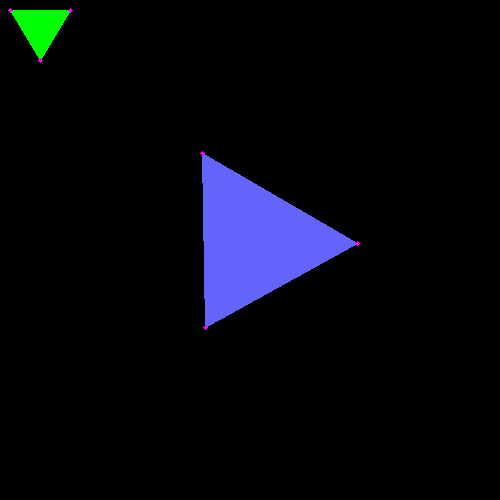

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

def draw_triangle(im, triangle, color=(0,255,0)):
    triangle = np.array([ v[:-1]/v[-1] for v in triangle] , np.uint16)
    cv.drawContours(im, [triangle.astype(int)], 0, color, -1)
    for v in triangle:
        cv.circle(im, tuple(v), 2, (255,0,255),-1)

def scale(vertex, sx, sy):
    scale_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
    return np.dot(scale_matrix, vertex.T).T

def rotate(vertex, a):
    rad = np.deg2rad(a)
    rotate_matrix = np.array([[np.cos(rad), -np.sin(rad), 0], [np.sin(rad), np.cos(rad), 0], [0, 0, 1]])
    return np.dot(rotate_matrix, vertex.T).T

def translate(vertex, dx, dy):
    translate_matrix = np.array([[1, 0, dx], [0, 1, dy], [0, 0, 1]])
    return np.dot(translate_matrix, vertex.T).T

w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

angle = 30
s = 3
t = 250

triangle1 = np.array( [[10,10,1], [70,10,1], [40, 60,1]])
triangle2 = translate(rotate(scale(translate(triangle1, -40,-30),s,s), angle), t,t)

draw_triangle(im, triangle1)
draw_triangle(im, triangle2, color= (250,100,100))

cv2_imshow(im)